In [1]:
## Prediction of CTC or Salary of New Hire using Machine Learning Techniques.
#1. Understand the data
#2. Transform categorical variables to the numerical variables
#3. Apply appropriate model to predict the CTC
#4. Evaluate the results of the analysis

In [2]:
## Importing neccessary libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ctc = pd.read_csv("ctc.csv")

In [5]:
ctc.head(10)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
5,6,Tier 2,Executive,Non-Metro,"54,340.00",4,73,31,"59,950.89"
6,7,Tier 2,Executive,Non-Metro,"60,298.00",1,42,46,"66,602.34"
7,8,Tier 3,Executive,Non-Metro,"49,944.00",2,56,37,"57,768.44"
8,9,Tier 1,Executive,Metro,"53,124.00",4,40,37,"70,083.30"
9,10,Tier 3,Executive,Non-Metro,"51,141.00",1,47,60,"85,648.48"


In [6]:
ctc.tail(10)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
1328,1329,Tier 1,Executive,Non-Metro,"47,080.00",4,66,23,"84,688.33"
1329,1330,Tier 1,Executive,Metro,"59,189.00",4,45,52,"82,670.85"
1330,1331,Tier 2,Executive,Non-Metro,"46,452.00",4,83,57,"70,993.97"
1331,1332,Tier 1,Executive,Non-Metro,"58,254.00",4,42,23,"73,463.16"
1332,1333,Tier 1,Executive,Non-Metro,"72,649.00",3,69,52,"78,861.46"
1333,1334,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,1335,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,1336,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,1337,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"
1337,1338,Tier 3,Manager,Non-Metro,"51,820.00",1,47,61,"83,346.06"


In [7]:
ctc.rename(columns = {'Previous CTC':'Previous_ctc','Previous job changes':'Previous_job_changes','Graduation marks':'Graduation_marks','Exp (Months)':'Exp_months'}, inplace = True)

In [8]:
ctc.shape

(1338, 9)

In [9]:
ctc.columns

Index(['S.No.', 'College', 'Role', 'City type', 'Previous_ctc',
       'Previous_job_changes', 'Graduation_marks', 'Exp_months', 'CTC'],
      dtype='object')

In [10]:
duplicate = ctc.duplicated()
sum(duplicate)

0

In [11]:
ctc.isna().sum()

S.No.                   0
College                 0
Role                    0
City type               0
Previous_ctc            0
Previous_job_changes    0
Graduation_marks        0
Exp_months              0
CTC                     0
dtype: int64

In [12]:
ctc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.No.                 1338 non-null   int64 
 1   College               1338 non-null   object
 2   Role                  1338 non-null   object
 3   City type             1338 non-null   object
 4   Previous_ctc          1338 non-null   object
 5   Previous_job_changes  1338 non-null   int64 
 6   Graduation_marks      1338 non-null   int64 
 7   Exp_months            1338 non-null   int64 
 8   CTC                   1338 non-null   object
dtypes: int64(4), object(5)
memory usage: 94.2+ KB


In [13]:
ctc.drop('S.No.' , axis =1, inplace = True)

In [14]:
ctc.nunique()

College                    3
Role                       2
City type                  2
Previous_ctc            1308
Previous_job_changes       4
Graduation_marks          51
Exp_months                47
CTC                     1338
dtype: int64

In [15]:
from pandas_profiling import ProfileReport

In [16]:
p = ProfileReport(ctc)
p

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
ctc.describe()

,Previous_job_changes,Graduation_marks,Exp_months
count,1338.000000,1338.000000,1338.000000
mean,2.525411,59.890882,39.207025
std,1.123502,14.894696,14.049960
min,1.000000,35.000000,18.000000
25%,2.000000,47.000000,27.000000
50%,3.000000,60.000000,39.000000
75%,4.000000,73.000000,51.000000
max,4.000000,85.000000,64.000000


In [18]:
import warnings
warnings.filterwarnings("ignore")


In [19]:
ctc['College'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [20]:
ctc['College'].value_counts()

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64

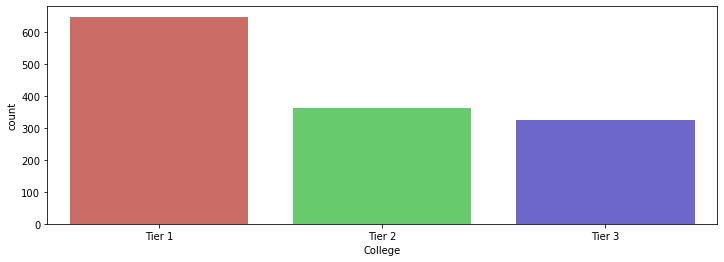

In [21]:
plt.figure(figsize = (12,4))
sns.countplot('College', data = ctc,palette = 'hls')
plt.show()

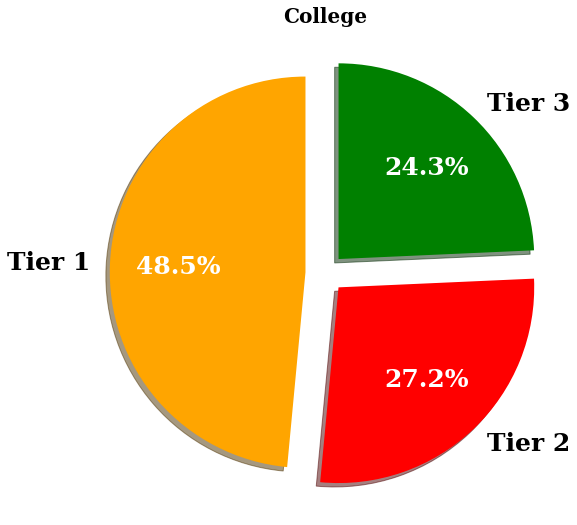

In [22]:
label_data = ctc['College'].value_counts()
explode = (0.1,0.1,0.1)
plt.figure(figsize = (12,9))
patches,texts,pcts = plt.pie(label_data,
                            labels = label_data.index,
                            colors = ['orange','red','green'],
                            pctdistance = 0.65,
                             shadow = True,
                             startangle = 90,
                             explode = explode,
                             autopct = '%1.1f%%',
                             textprops ={'fontsize' :25,
                                        'color' : 'black',
                                        'weight': 'bold',
                                        'family':'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('College', size = 20, **hfont)
fig = plt.gcf()
plt.show()

In [23]:
ctc['Role'].value_counts()

Executive    1064
Manager       274
Name: Role, dtype: int64

In [24]:
ctc['Role'].unique()

array(['Manager', 'Executive'], dtype=object)

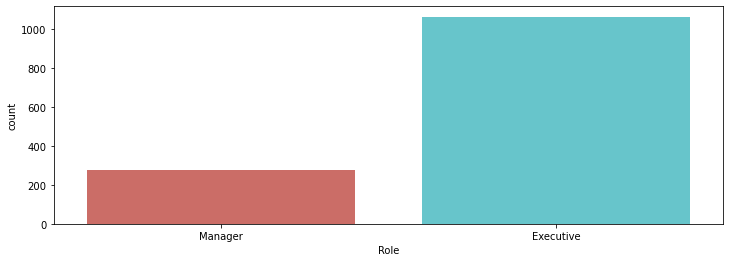

In [25]:
plt.figure(figsize = (12,4))
sns.countplot('Role', data = ctc,palette = 'hls')
plt.show()

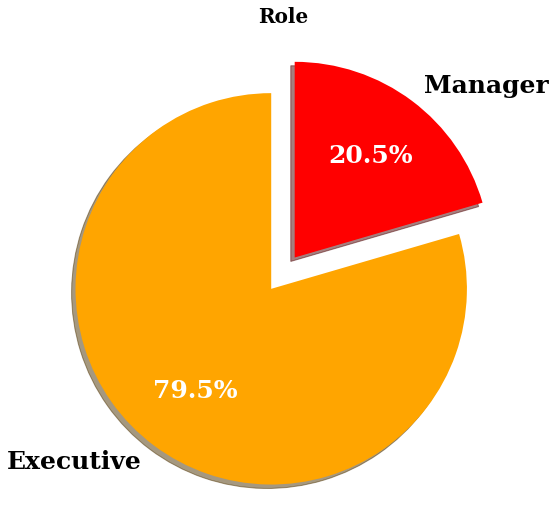

In [26]:
label_data = ctc['Role'].value_counts()
explode = (0.1,0.1)
plt.figure(figsize = (12,9))
patches,texts,pcts = plt.pie(label_data,
                            labels = label_data.index,
                            colors = ['orange','red'],
                            pctdistance = 0.65,
                             shadow = True,
                             startangle = 90,
                             explode = explode,
                             autopct = '%1.1f%%',
                             textprops ={'fontsize' :25,
                                        'color' : 'black',
                                        'weight': 'bold',
                                        'family':'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('Role', size = 20, **hfont)
fig = plt.gcf()
plt.show()

In [27]:
ctc['City type'].value_counts()

Metro        676
Non-Metro    662
Name: City type, dtype: int64

In [28]:
ctc['City type'].unique()

array(['Non-Metro', 'Metro'], dtype=object)

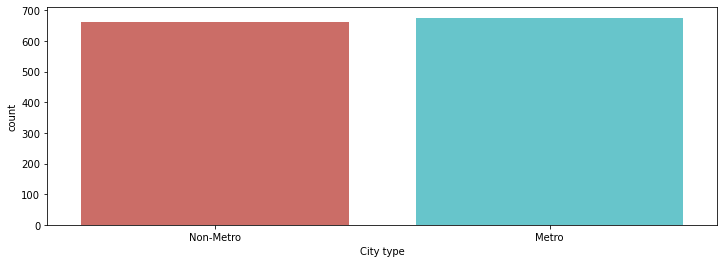

In [29]:
plt.figure(figsize = (12,4))
sns.countplot('City type', data = ctc,palette = 'hls')
plt.show()

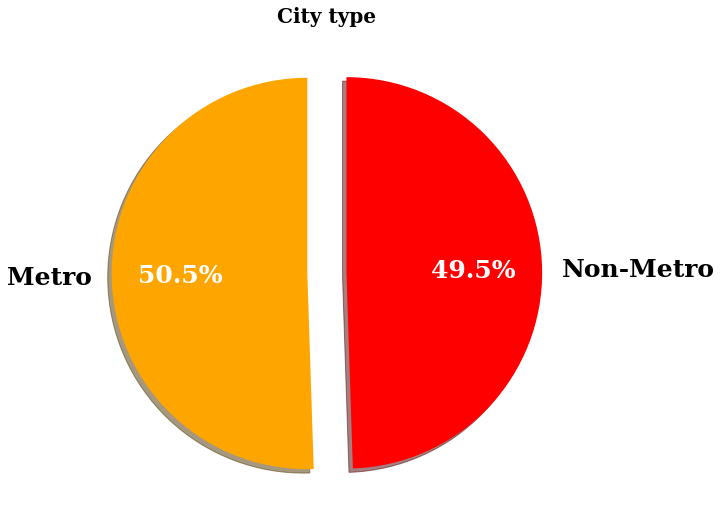

In [30]:
label_data = ctc['City type'].value_counts()
explode = (0.1,0.1)
plt.figure(figsize = (12,9))
patches,texts,pcts = plt.pie(label_data,
                            labels = label_data.index,
                            colors = ['orange','red'],
                            pctdistance = 0.65,
                             shadow = True,
                             startangle = 90,
                             explode = explode,
                             autopct = '%1.1f%%',
                             textprops ={'fontsize' :25,
                                        'color' : 'black',
                                        'weight': 'bold',
                                        'family':'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('City type', size = 20, **hfont)
fig = plt.gcf()
plt.show()

In [31]:
ctc['Previous_job_changes'].value_counts()

3    348
4    344
1    333
2    313
Name: Previous_job_changes, dtype: int64

In [32]:
ctc['Previous_job_changes'].unique()

array([3, 1, 2, 4], dtype=int64)

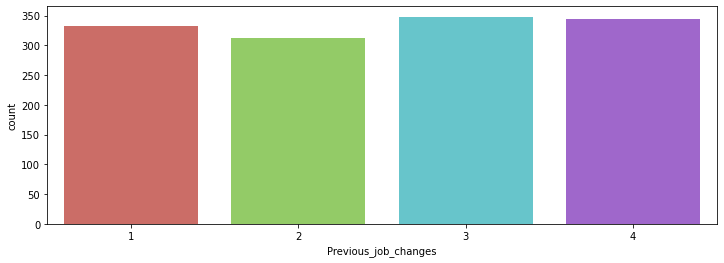

In [33]:
plt.figure(figsize = (12,4))
sns.countplot('Previous_job_changes', data = ctc,palette = 'hls')
plt.show()

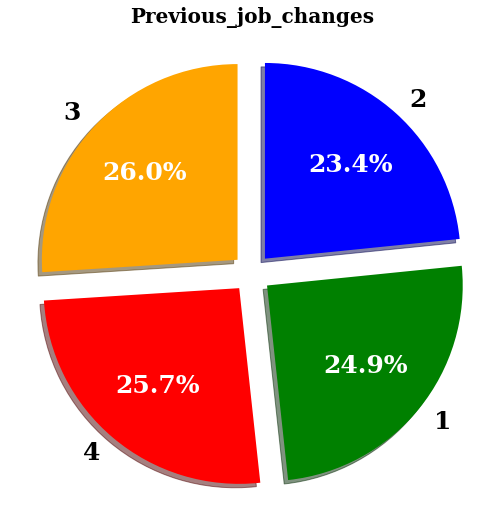

In [34]:
label_data = ctc['Previous_job_changes'].value_counts()
explode = (0.1,0.1,0.1,0.1)
plt.figure(figsize = (12,9))
patches,texts,pcts = plt.pie(label_data,
                            labels = label_data.index,
                            colors = ['orange','red','green','blue'],
                            pctdistance = 0.65,
                             shadow = True,
                             startangle = 90,
                             explode = explode,
                             autopct = '%1.1f%%',
                             textprops ={'fontsize' :25,
                                        'color' : 'black',
                                        'weight': 'bold',
                                        'family':'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname':'serif', 'weight':'bold'}
plt.title('Previous_job_changes', size = 20, **hfont)
fig = plt.gcf()
plt.show()

In [35]:
ctc['Previous_ctc'] = ctc['Previous_ctc'].str.replace(',','')
ctc['Previous_ctc'] = ctc['Previous_ctc'].astype(float)
ctc['CTC'] = ctc['CTC'].str.replace(',','')
ctc['CTC'] = ctc['CTC'].astype(float)

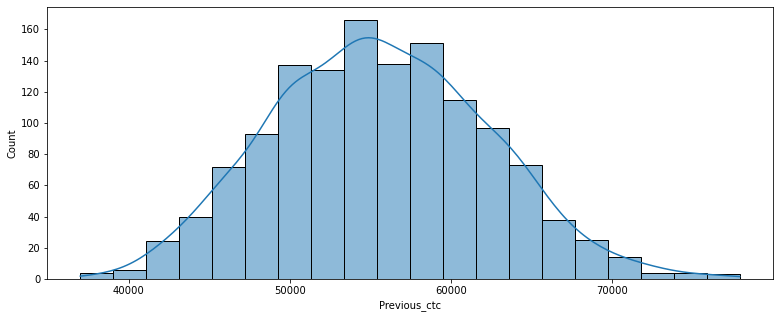

In [36]:
plt.figure(figsize = (13,5))
sns.histplot(ctc['Previous_ctc'], kde=True,bins=20,palette='hls')
plt.show()

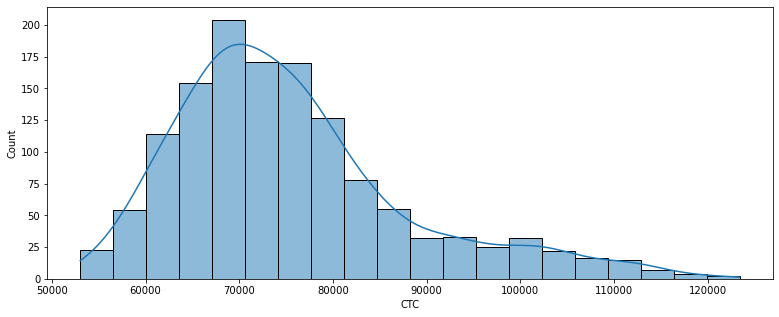

In [37]:
plt.figure(figsize = (13,5))
sns.histplot(ctc['CTC'], kde=True,bins=20,palette='hls')
plt.show()

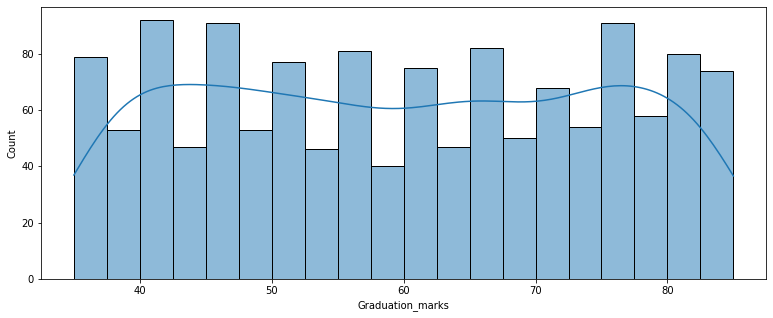

In [38]:
plt.figure(figsize = (13,5))
sns.histplot(ctc['Graduation_marks'], kde=True,bins=20,palette='hls')
plt.show()

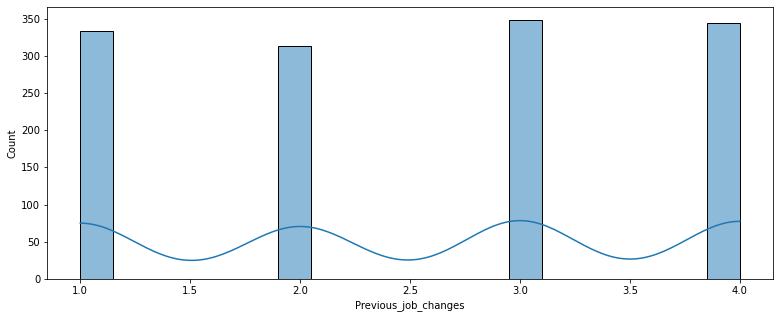

In [39]:
plt.figure(figsize = (13,5))
sns.histplot(ctc['Previous_job_changes'], kde=True,bins=20,palette='hls')
plt.show()

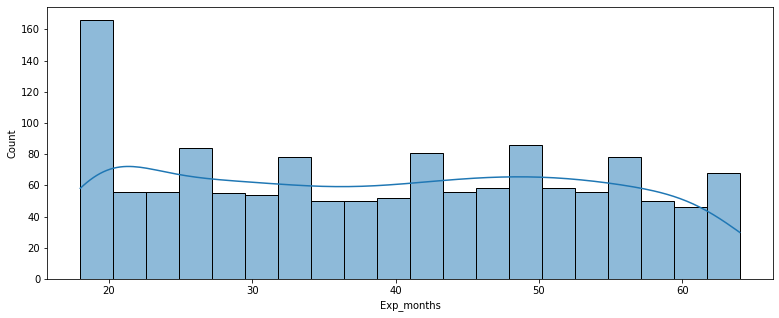

In [40]:
plt.figure(figsize = (13,5))
sns.histplot(ctc['Exp_months'], kde=True,bins=20,palette='hls')
plt.show()

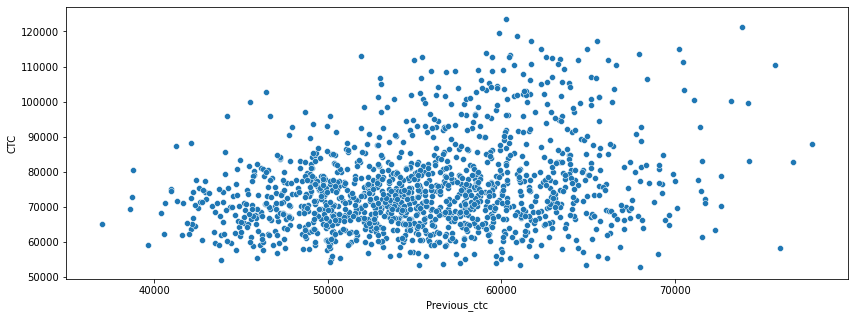

In [41]:
plt.figure(figsize = (14,5))
sns.scatterplot(x = ctc['Previous_ctc'], y=ctc['CTC'],data=ctc , palette = 'hls')
plt.show()

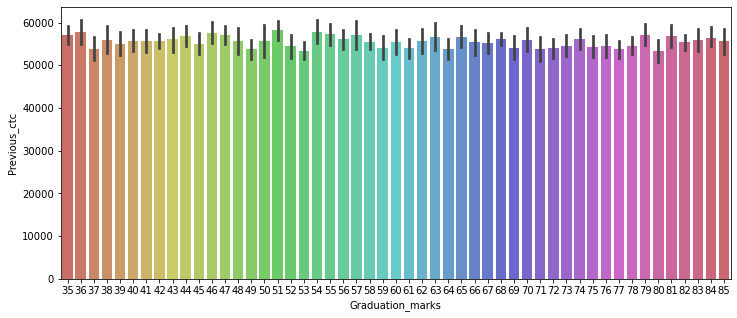

In [42]:
plt.figure(figsize =(12,5))
sns.barplot(y =ctc['Previous_ctc'], x= ctc['Graduation_marks'], data=ctc , palette = 'hls')
plt.show()

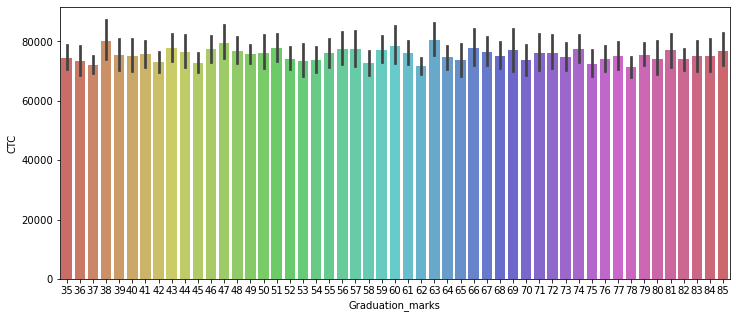

In [43]:
plt.figure(figsize =(12,5))
sns.barplot(y =ctc['CTC'], x= ctc['Graduation_marks'], data=ctc , palette = 'hls')
plt.show()

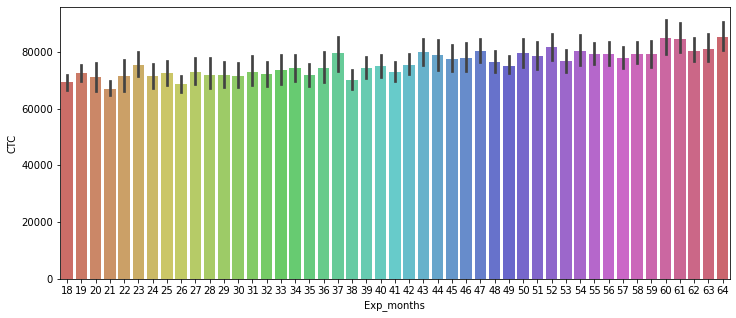

In [44]:
plt.figure(figsize =(12,5))
sns.barplot(y =ctc['CTC'], x= ctc['Exp_months'], data=ctc , palette = 'hls')
plt.show()

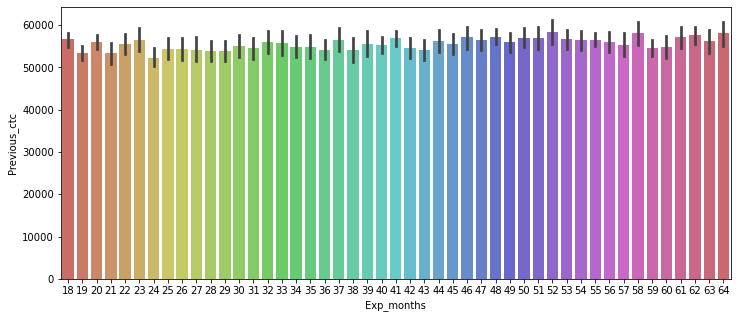

In [45]:
plt.figure(figsize =(12,5))
sns.barplot(y =ctc['Previous_ctc'], x= ctc['Exp_months'], data=ctc , palette = 'hls')
plt.show()

<AxesSubplot:xlabel='Previous_ctc'>

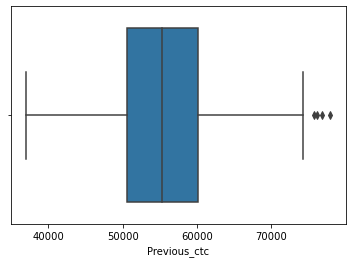

In [46]:
sns.boxplot(ctc.Previous_ctc)

<AxesSubplot:xlabel='Previous_job_changes'>

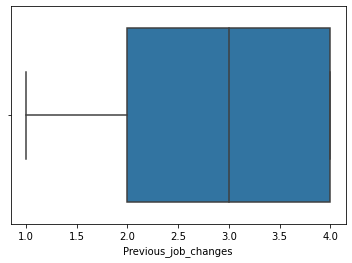

In [47]:
sns.boxplot(ctc.Previous_job_changes)

<AxesSubplot:xlabel='Graduation_marks'>

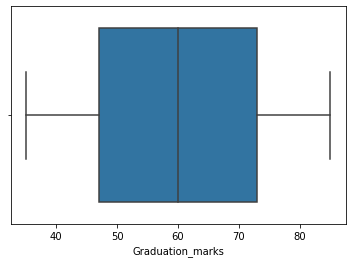

In [48]:
sns.boxplot(ctc.Graduation_marks)

<AxesSubplot:xlabel='Exp_months'>

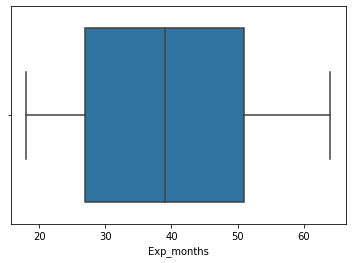

In [49]:
sns.boxplot(ctc.Exp_months)

<AxesSubplot:xlabel='CTC'>

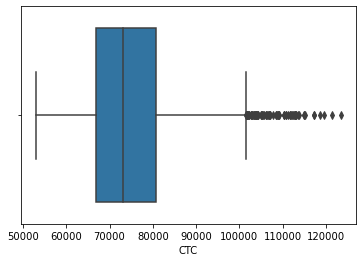

In [50]:
sns.boxplot(ctc.CTC)

In [51]:
c1=ctc.copy()
IQR = c1['Previous_ctc'].quantile(0.75) - c1['Previous_ctc'].quantile(0.25)
lower_limit = c1['Previous_ctc'].quantile(0.25) - (IQR * 1.5)
upper_limit = c1['Previous_ctc'].quantile(0.75) + (IQR * 1.5)
IQR

9603.5

In [52]:
outliers_c1 = np.where(c1.Previous_ctc > upper_limit, True, np.where(c1.Previous_ctc < lower_limit, True, False))
c1_trimmed = c1.loc[~(outliers_c1), ]
c1.shape, c1_trimmed.shape

((1338, 8), (1334, 8))

<AxesSubplot:xlabel='Previous_ctc'>

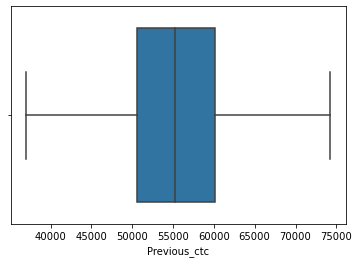

In [53]:
sns.boxplot(c1_trimmed.Previous_ctc)

In [62]:
IQR = c1_trimmed['CTC'].quantile(0.75) - c1_trimmed['CTC'].quantile(0.25)
lower_limit = c1_trimmed['CTC'].quantile(0.25) - (IQR * 1.5)
upper_limit = c1_trimmed['CTC'].quantile(0.75) + (IQR * 1.5)
IQR

12287.289999999994

In [63]:
outliers_c1 = np.where(c1_trimmed.CTC > upper_limit, True, np.where(c1_trimmed.CTC < lower_limit, True, False))
c1_trimmed = c1_trimmed.loc[~(outliers_c1), ]
c1.shape, c1_trimmed.shape

((1338, 8), (1232, 8))

<AxesSubplot:xlabel='CTC'>

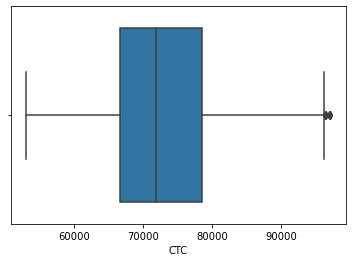

In [64]:
sns.boxplot(c1_trimmed.CTC)

In [65]:
ctc.corr()

,Previous_ctc,Previous_job_changes,Graduation_marks,Exp_months,CTC
Previous_ctc,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous_job_changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation_marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp_months,0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


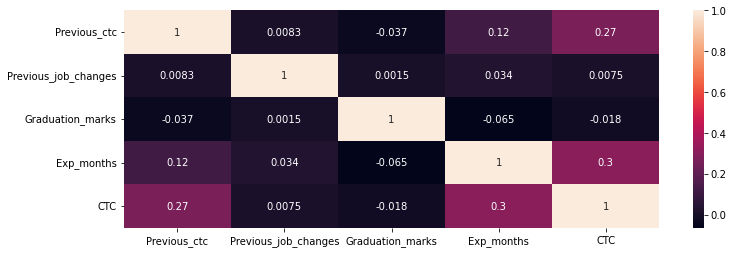

In [66]:
plt.figure(figsize=(12,4))
sns.heatmap(ctc.corr(),annot = True)
plt.show()

In [67]:
cols = ['College','Role','City type']

In [68]:
for col in cols:
    one = pd.get_dummies(ctc[col],prefix=col)
    ctc=pd.concat([ctc,one],axis=1).drop(col,axis=1)

In [69]:
ctc

,Previous_ctc,Previous_job_changes,Graduation_marks,Exp_months,CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523.0,3,66,19,71406.58,1,0,0,0,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,1,0,1,0,1,0
3,49010.0,2,81,33,82092.39,0,0,1,1,0,1,0
4,57879.0,4,74,32,73878.10,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,59661.0,4,68,50,69712.40,0,0,1,1,0,1,0
1334,53714.0,1,67,18,69298.75,1,0,0,1,0,0,1
1335,61957.0,1,47,18,66397.77,0,1,0,1,0,0,1
1336,53203.0,3,69,21,64044.38,1,0,0,1,0,0,1


In [70]:
ctc.drop(['College_Tier 3','Role_Executive','City type_Non-Metro'],axis=1,inplace=True)

In [71]:
ctc

,Previous_ctc,Previous_job_changes,Graduation_marks,Exp_months,CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523.0,3,66,19,71406.58,1,0,1,0
1,57081.0,1,84,18,68005.87,0,1,0,1
2,60347.0,2,52,28,76764.02,0,1,0,1
3,49010.0,2,81,33,82092.39,0,0,0,1
4,57879.0,4,74,32,73878.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,59661.0,4,68,50,69712.40,0,0,0,1
1334,53714.0,1,67,18,69298.75,1,0,0,0
1335,61957.0,1,47,18,66397.77,0,1,0,0
1336,53203.0,3,69,21,64044.38,1,0,0,0


In [72]:
x=ctc.drop('CTC',axis=1)
y=ctc['CTC']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred = lr.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
RMSE_lr = mean_squared_error(y_test,y_pred,squared=False)
RMSE_lr

7670.43321423098

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(lr,X_train,y_train,cv=10)

array([0.55864993, 0.38806924, 0.57106455, 0.62071295, 0.70534059,
       0.46171197, 0.57571622, 0.63611875, 0.61297098, 0.67314823])

In [82]:
from sklearn.tree import DecisionTreeRegressor


In [83]:
dt = DecisionTreeRegressor(random_state=0)

In [84]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [85]:
y_pred = dt.predict(X_test)

In [86]:
RMSE_dt = mean_squared_error(y_test,y_pred,squared=False)
RMSE_dt

10276.246224014008

In [87]:
cross_val_score(dt,X_train,y_train,cv=10)

array([ 0.28012064, -0.27953103,  0.10680434,  0.37894821,  0.31544105,
        0.0458518 ,  0.13882109,  0.12282517,  0.41180716,  0.26473834])

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(max_depth=2,random_state=0)

In [90]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [91]:
y_pred = rf.predict(X_test)

In [92]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared = False)
RMSE_rf

7865.8995327163375

In [93]:
cross_val_score(rf,X_train,y_train,cv=10)

array([0.50323297, 0.34208814, 0.59809149, 0.56427136, 0.62320346,
       0.36933632, 0.60269117, 0.61869307, 0.67799474, 0.63271559])

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
#define grid of hyperparameter to search

In [96]:
param_grid={'fit_intercept':[True,False],
           'normalize':[True,False]}

In [97]:
#create linear regression model

In [98]:
lin_reg = LinearRegression()

In [99]:
#create a grid search object

In [100]:
grid_search = GridSearchCV(lin_reg, param_grid, cv=5)


In [101]:
#fit the grid search to the data

In [102]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [103]:
#get the best Hyperparameter

In [104]:
best_fit_intercept = grid_search.best_params_['fit_intercept']
best_normalize = grid_search.best_params_['normalize']

In [105]:
# Train a linear regression model with the best hyperparameters

In [106]:
lin_reg_best = LinearRegression(fit_intercept=best_fit_intercept,
                                 normalize=best_normalize)
lin_reg_best.fit(X_train, y_train)

LinearRegression(normalize=True)

In [107]:
y_pred = lin_reg_best.predict(X_test)

In [108]:
RMSE_lr = mean_squared_error(y_test, y_pred, squared = False)
RMSE_lr

7670.433214231368

In [109]:
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4]}

In [110]:
dtr = DecisionTreeRegressor()

In [111]:
grid_search = GridSearchCV(dtr, param_grid, cv=5)

In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [113]:
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

In [114]:
dtr_best = DecisionTreeRegressor(max_depth=best_max_depth,
                                  min_samples_split=best_min_samples_split)
dtr_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [115]:
y_pred = dtr_best.predict(X_test)

In [116]:
RMSE_dt = mean_squared_error(y_test, y_pred, squared = False)
RMSE_dt

7753.202070450855

In [117]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 2, 3, 4, 5]}

In [118]:
rfr = RandomForestRegressor()

In [119]:
grid_search = GridSearchCV(rfr, param_grid, cv=5)

In [120]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100]})

In [121]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

In [122]:
rfr_best = RandomForestRegressor(n_estimators=best_n_estimators,
                                  max_depth=best_max_depth)
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=50)

In [123]:
y_pred = rfr_best.predict(X_test)

In [124]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared = False)
RMSE_rf

7221.797918958356